t1 =  1.0041
t2 =  0.28844
t3 =  0.28994


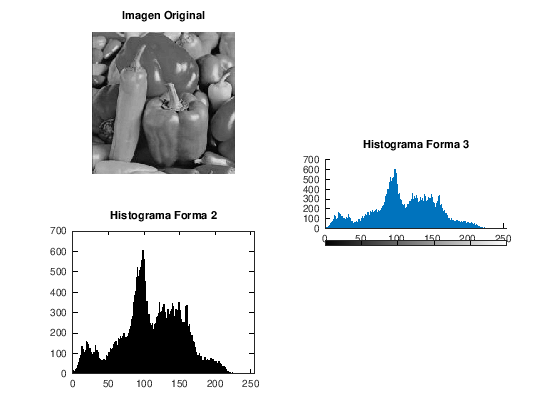

In [26]:
pkg load image


A = imread("images/peppers.jpg");
subplot(2,2,1);
imshow(A);
title ("Imagen Original");

%Forma 1 de calcular el histograma (Brute Force)
h1 = zeros(256,1);
[m,n] = size(A);

tic
for x=1:m
    for y=1:n
        h1(A(x,y)+1)= h1(A(x,y)+1)+1;
    end
end

subplot(2,2,2);
bar(0:255,h1);
title("Histograma Forma 1");
xlim([0 255]);
t1 = toc


%Forma 2 de calcular el histograma
h2 = zeros(256,1);
tic
for i=0:255
    h2(i+1) = sum(sum(A==i));
end

subplot(2,2,3);
bar(0:255,h2);
title("Histograma Forma 2");
xlim([0,255]);
t2= toc


%Forma 3 de calclular el histograma
tic
subplot(3,2,4);
imhist(A); %Comando de Octave para graficar el histograma
title("Histograma Forma 3"); %Gasta mucho tiempo en el graficar
t3 = toc

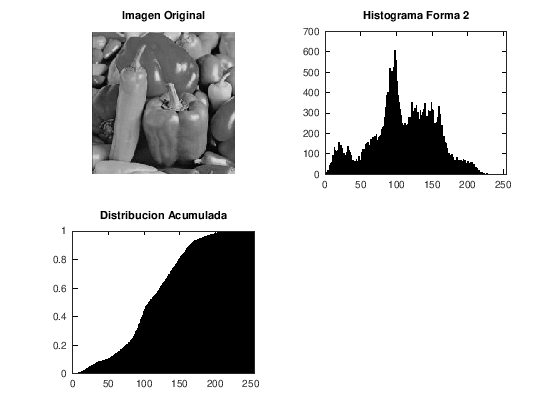

In [24]:
pkg load image


A = imread("images/peppers.jpg");
subplot(2,2,1);
imshow(A);
title ("Imagen Original");

h = zeros(256,1);
for i=0:255
    h(i+1) = sum(sum(A==i));
end

subplot(2,2,2);
bar(0:255,h);
title("Histograma");
xlim([0,255]);



%Distirbucion Acumulada
ac = zeros(256,1);
[m,n] = size(A);
for i=0:255
    ac(i+1) = sum(h(1:i+1))/(m*n);
end
subplot(2,2,3);
bar(0:255,ac);
title("Distribucion Acumulada");
xlim([0 255])

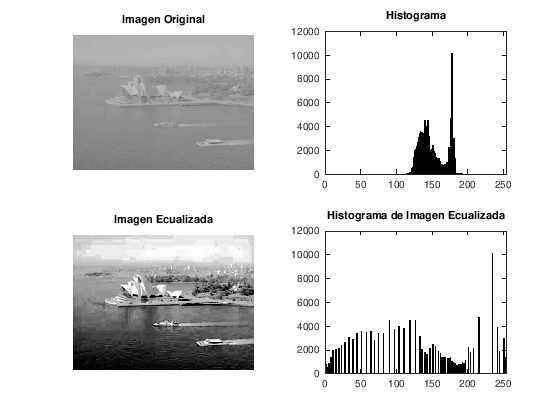

In [23]:
pkg load image

A = imread("images/sydney.jpg");
subplot(2,2,1);
imshow(A);
title ("Imagen Original");

h = zeros(256,1);
for i=0:255
    h(i+1) = sum(sum(A==i));
end

subplot(2,2,2);
bar(0:255,h);
title("Histograma");
xlim([0,255]);


%Distirbucion Acumulada
ac = zeros(256,1);
[m,n] = size(A);
for i=0:255
    ac(i+1) = sum(h(1:i+1))/(m*n);
end

%Obtener la nueva imagen aplicando la tecnica de ecualizacion
B = zeros(m,n);
A = double(A);

for x=1:m
    for y=1:n
        B(x,y) = round(ac(A(x,y)+1)*255);
    end
end

B = uint8(B);
subplot(2,2,3)
imshow(B)
title("Imagen Ecualizada")


%Histograma de la Imagen Ecualizada
h2 = zeros(256,1);
for i=0:255
    h2(i+1) = sum(sum(B==i));
end

subplot(2,2,4);
bar(0:255,h2);
title("Histograma de Imagen Ecualizada");
xlim([0,255]);



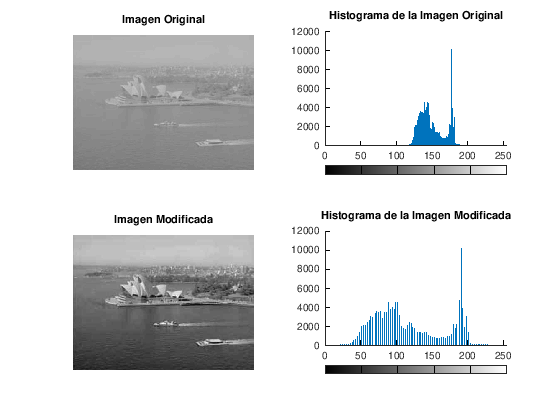

In [4]:
pkg load image
A = imread("images/sydney.jpg");
subplot(2,2,1)
imshow(A)
title("Imagen Original")

subplot(2,2,2);
imhist(A);
title("Histograma de la Imagen Original");

A = double(A);
r_min = min(min(A));
r_max = max(max(A));

B = (255/(r_max-r_min))*(A-r_min);
B = uint8(B);
subplot(2,2,3)
imshow(B)
title("Imagen Modificada")

subplot(2,2,4);
imhist(B);
title("Histograma de la Imagen Modificada");


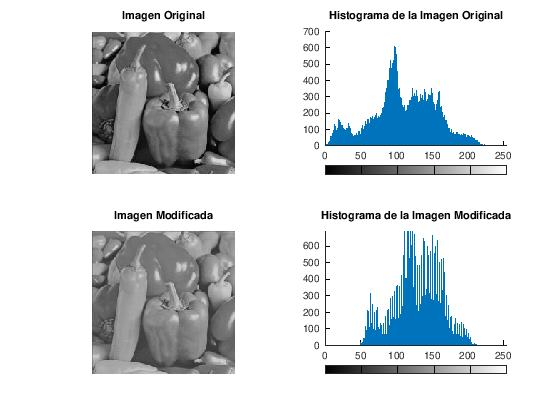

In [13]:
pkg load image
A = imread("images/peppers.jpg");
subplot(2,2,1)
imshow(A)
title("Imagen Original")

subplot(2,2,2);
imhist(A);
title("Histograma de la Imagen Original");

A = double(A);
r_min = min(min(A)); r_max = max(max(A));
s_min = r_min+50; %s_min debe ser mas grande que r_min
s_max = r_max-50; %s_max debe ser mas pequeño que r_max

B = ((s_max-s_min)/(r_max-s_min))*(A-r_min)+s_min;
B = uint8(B);
subplot(2,2,3)
imshow(B)
title("Imagen Modificada")

subplot(2,2,4);
imhist(B);
title("Histograma de la Imagen Modificada");

Que se les ocurre para modificar y trasladar la imagen obtenida al intervalo [101,228] sin tener que vovler a aplicar la reduccion del histograma

Investigar la tenicda de Histogram Matching o Histogram Specification en imagenes. En que consiste, Formulacion Matematica, Implementacion en Octave.